In [1]:
# Import the required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
# Import the data

countrydata = pd.read_csv('D:\PGDDS\Machine Learning\Module 6 Clustering Assignment\Data\Country-data.csv')
countrydata.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Convert the columns which are in % (i.e exports, health, imports) to the numbers

countrydata['exports'] = round((countrydata['exports']*countrydata['gdpp'])/100,2)
countrydata['health'] = round((countrydata['health']*countrydata['gdpp'])/100,2)
countrydata['imports'] = round((countrydata['imports']*countrydata['gdpp'])/100,2)
countrydata.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


In [4]:
# Check info

countrydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# view the description

countrydata.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618862,1056.733174,6588.352096,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885789,1801.408921,14710.810423,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.080000,12.820000,0.650000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535000,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.890000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# Find the null data quantity

countrydata.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

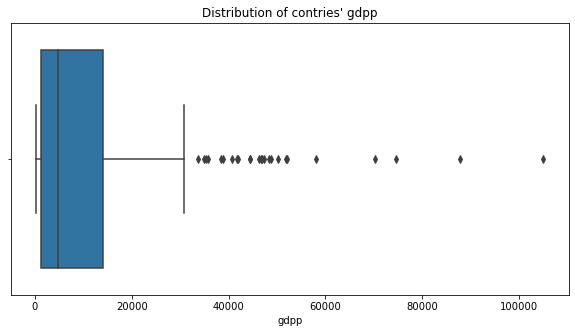

In [7]:
# gdpp boxplot

plt.figure(figsize=(10,5))
sns.boxplot(countrydata.gdpp)
plt.title("Distribution of contries' gdpp")
plt.show()

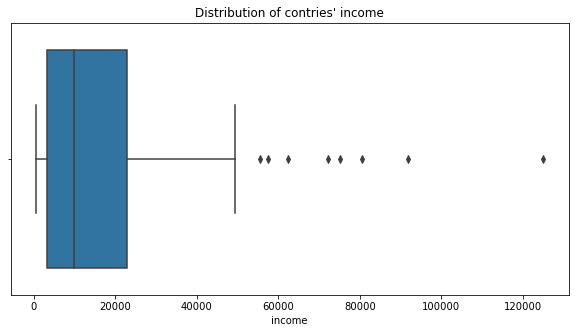

In [8]:
# income boxplot

plt.figure(figsize=(10,5))
sns.boxplot(countrydata.income)
plt.title("Distribution of contries' income")
plt.show()

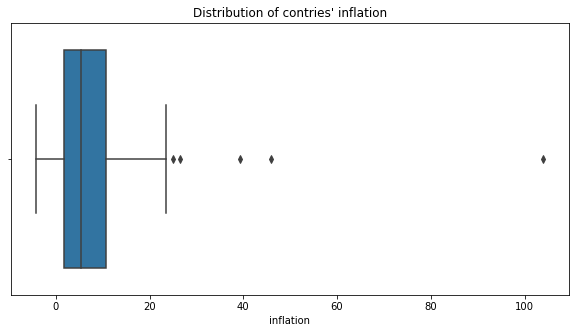

In [9]:
# inflation boxplot

plt.figure(figsize=(10,5))
sns.boxplot(countrydata.inflation)
plt.title("Distribution of contries' inflation")
plt.show()

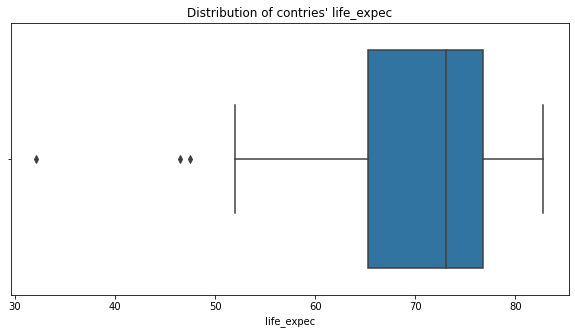

In [10]:
# life_expec boxplot

plt.figure(figsize=(10,5))
sns.boxplot(countrydata.life_expec)
plt.title("Distribution of contries' life_expec")
plt.show()

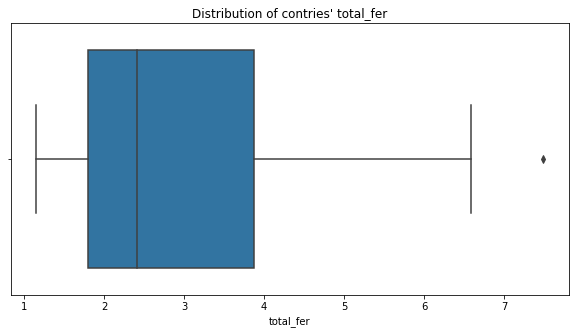

In [11]:
# total_fer boxplot

plt.figure(figsize=(10,5))
sns.boxplot(countrydata.total_fer)
plt.title("Distribution of contries' total_fer")
plt.show()

Here gdpp, income, inflation has more outliers. Outlier treatment is necessary but inflation outliers cannot be removed as 
outliers on higher end represent countries with more inflation. So removing them from inflation data means removing the countries with major problems.

In [12]:
# percentile descriptions

countrydata.describe(percentiles = [0.25,0.5,0.75,0.90,0.95,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618862,1056.733174,6588.352096,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885789,1801.408921,14710.810423,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.080000,12.820000,0.650000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535000,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.890000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [13]:
# Handling gdpp outliers

q1 = countrydata['gdpp'].quantile(0.01)
q3 = countrydata['gdpp'].quantile(0.95)

country_quant = countrydata[(countrydata.gdpp <= q3)]

In [14]:
# dataframe after outlier treatment percentile description

country_quant.describe(percentiles = [0.25,0.5,0.75,0.90,0.95,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,40.196203,4930.901582,781.770506,4672.041139,14614.955696,8.099367,69.966456,3.009620,9913.379747
std,40.622685,9588.714781,1316.883539,8370.829592,15224.031790,10.759661,8.780099,1.533079,12717.283188
min,2.600000,1.080000,12.820000,0.650000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,10.300000,428.287500,67.990000,536.700000,3290.000000,1.935000,64.150000,1.810000,1310.000000
50%,20.900000,1634.595000,273.190000,1823.400000,9790.000000,5.460000,71.850000,2.530000,4480.000000
75%,62.500000,5629.750000,812.497500,5872.430000,20100.000000,11.175000,76.400000,4.200000,12075.000000
90%,103.100000,12796.470000,2246.874000,11676.000000,36200.000000,16.850000,80.030000,5.346000,31670.000000
95%,116.450000,18553.680000,3968.045000,15773.450000,41415.000000,21.125000,80.960000,5.912000,41815.000000
99%,154.300000,32987.598000,5243.796000,32783.304000,73433.000000,42.081000,82.301000,6.567200,47115.000000


In [15]:
# shape of dataframe

country_quant.shape

(158, 10)

### Visualization

<Figure size 288x288 with 0 Axes>

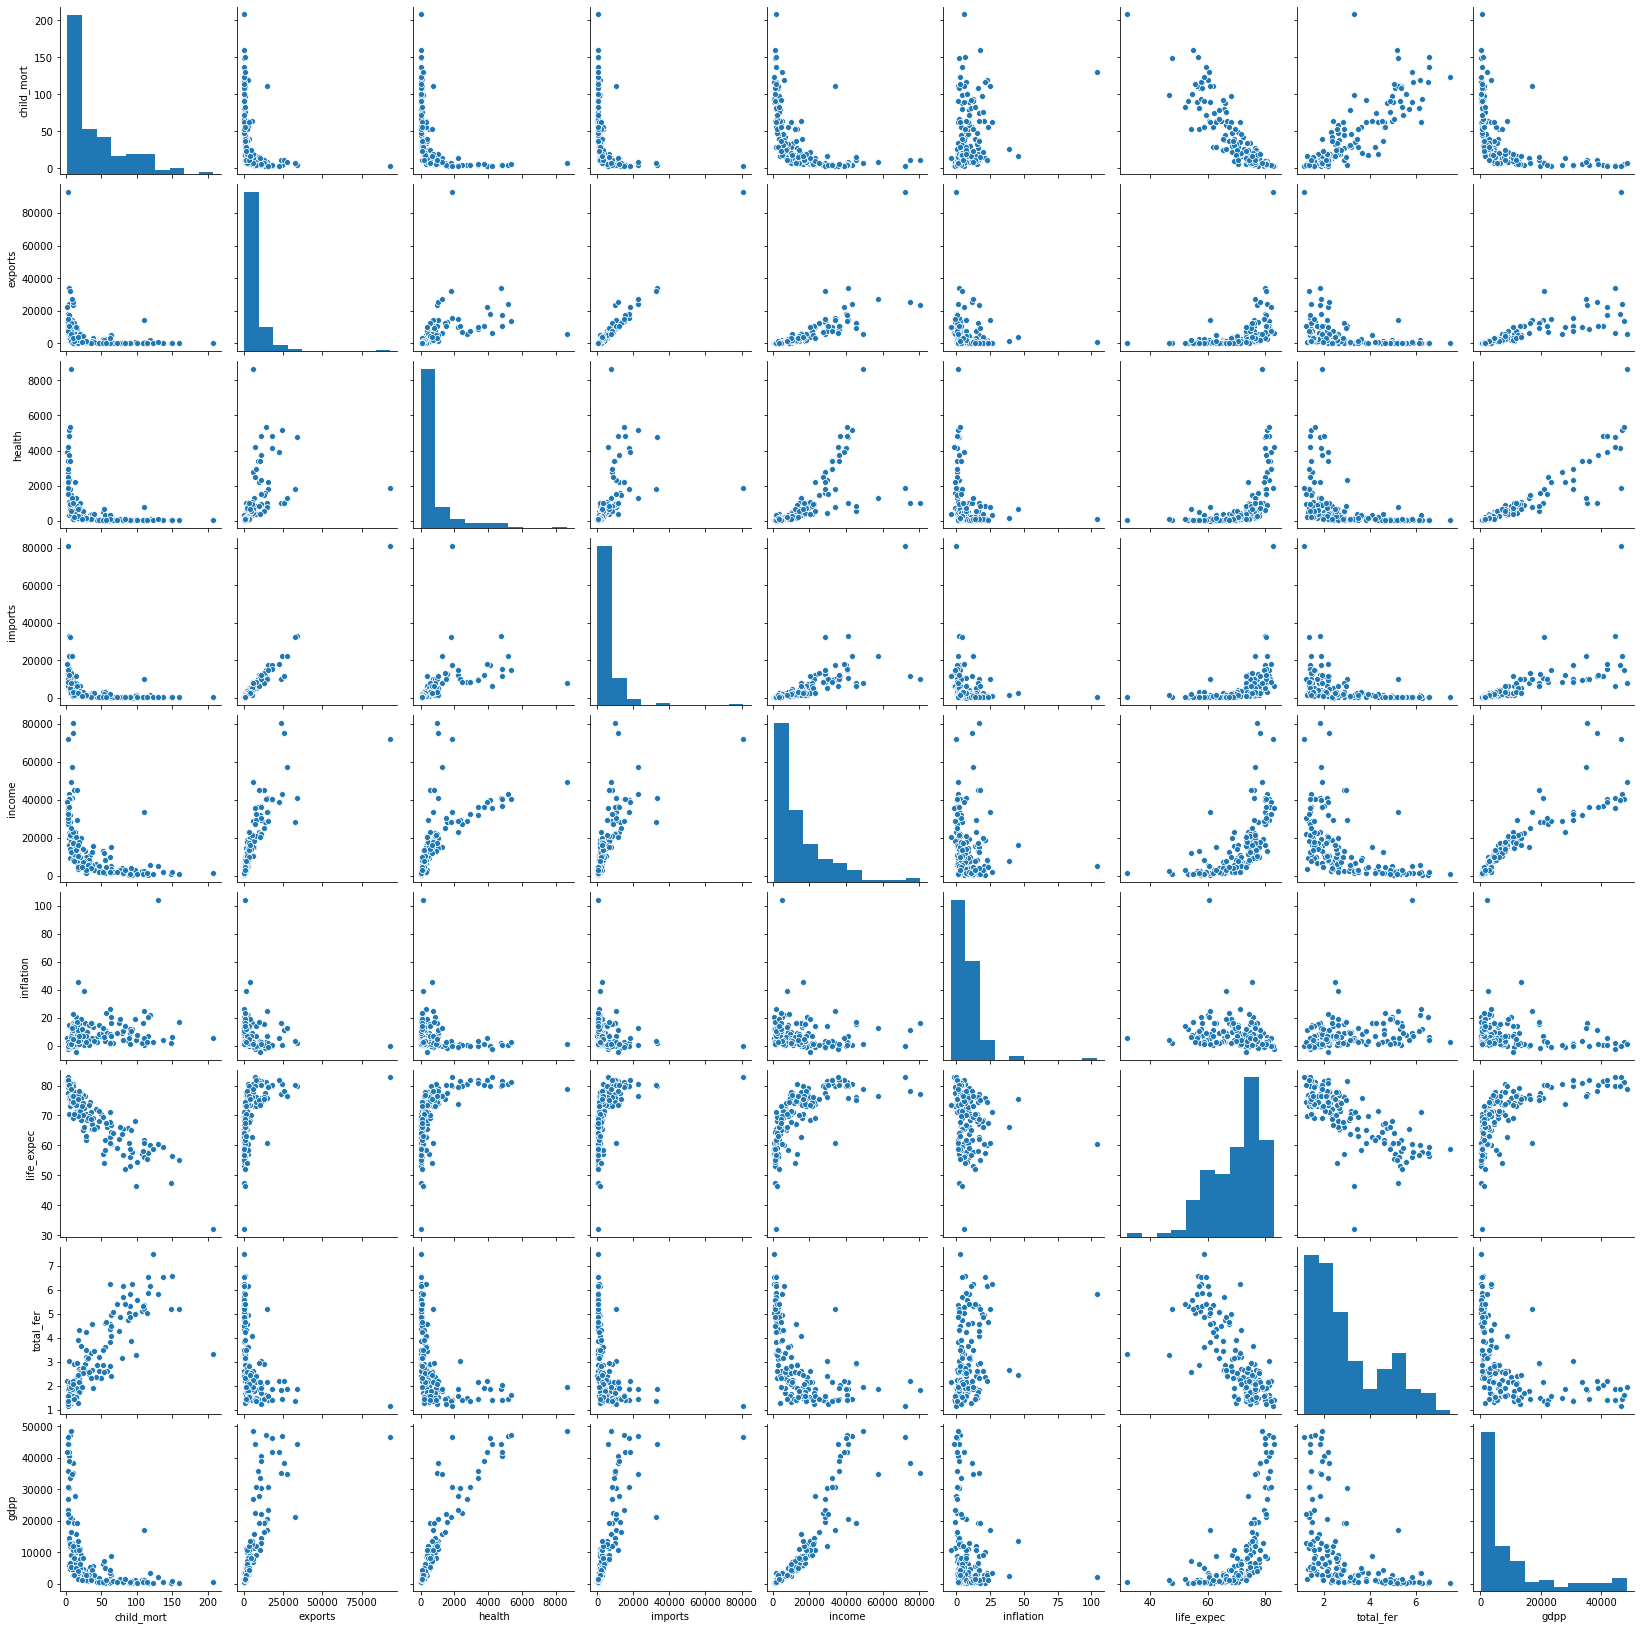

In [16]:
#pairplot of numerical variables

plt.figure(figsize = (4,4))
sns.pairplot(country_quant)
plt.show()

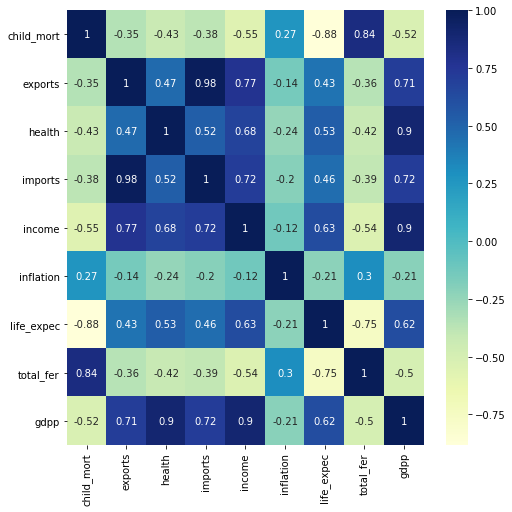

In [17]:
# Heatmap for correlation

plt.figure(figsize = (8,8))  
sns.heatmap(country_quant.corr(),annot = True,cmap="YlGnBu")

## HOPKINS: Cluster Tendency

In [18]:
#Calculating the Hopkins statistic

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [19]:
country_quant.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


In [20]:
# hopkings value

hopkins(country_quant.drop('country',axis=1))

0.9553096010734756

## Scaling

In [21]:
# set country column as index

country_quant.set_index('country', inplace=True)

In [22]:
# fit_transform

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1 = ss.fit_transform(country_quant)
df1

array([[ 1.2348468 , -0.51008967, -0.56360563, ..., -1.57290118,
         1.83898931, -0.73837646],
       [-0.58270965, -0.39606338, -0.39145788, ...,  0.7236459 ,
        -0.88967589, -0.45936668],
       [-0.3184725 , -0.33669732, -0.45386315, ...,  0.74649712,
        -0.07827425, -0.4301799 ],
       ...,
       [-0.41725274, -0.4171968 , -0.52728381, ...,  0.35802647,
        -0.69336904, -0.6786619 ],
       [ 0.39768425, -0.4747592 , -0.54384498, ..., -0.28180754,
         1.08647972, -0.6786619 ],
       [ 1.05951187, -0.45935901, -0.53003385, ..., -2.05277669,
         1.56415972, -0.66682942]])

In [23]:
# Scaling dataframe

df1 = pd.DataFrame(df1, columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp'])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.234847,-0.510090,-0.563606,-0.530151,-0.856955,0.124994,-1.572901,1.838989,-0.738376
1,-0.582710,-0.396063,-0.391458,-0.321693,-0.308713,-0.336520,0.723646,-0.889676,-0.459367
2,-0.318473,-0.336697,-0.453863,-0.392076,-0.113006,0.745941,0.746497,-0.078274,-0.430180
3,1.946065,-0.285794,-0.518904,-0.378423,-0.574267,1.333323,-1.127302,2.061470,-0.503541
4,-0.738289,0.064875,-0.035126,0.301255,0.295540,-0.620888,0.780774,-0.575585,0.180376


## Finding the best value of K

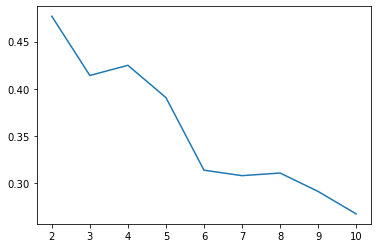

In [24]:
# silhouette curve

from sklearn.metrics import silhouette_score

ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])
    
sil = pd.DataFrame(ss)
plt.plot(sil[0], sil[1])

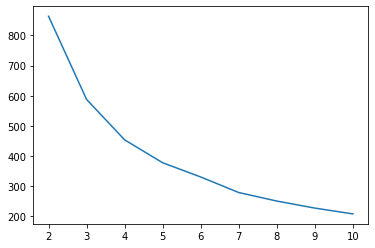

In [25]:
# ssd elbow curve

ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0],ssd[1])

## KMeans K==3

In [26]:
# KMeans considering k=3

kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(df1)

KMeans(n_clusters=3, random_state=0)

In [27]:
kmean.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1,
       0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0, 1,
       1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1, 2, 1,
       0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 2, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 2, 0,
       0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 2, 2])

In [28]:
countrydata.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


In [29]:
country_quant['cluster_id']= kmean.labels_

<ipython-input-29-a503b62cd453>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_quant['cluster_id']= kmean.labels_


In [30]:
country_quant.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
country,,,,,,,,,,
Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,2
Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,1
Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,1
Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,2
Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,1


In [31]:
# check how many datapoints are in each cluster

country_quant.cluster_id.value_counts()

1    82
2    48
0    28
Name: cluster_id, dtype: int64

In [32]:
# Clusterwise mean values

child_mort_mean = pd.DataFrame(country_quant.groupby(["cluster_id"]).child_mort.mean())
exports_mean= pd.DataFrame(country_quant.groupby(["cluster_id"]).exports.mean())
health_mean = pd.DataFrame(country_quant.groupby(["cluster_id"]).health.mean())
imports_mean = pd.DataFrame(country_quant.groupby(["cluster_id"]).imports.mean())
income_mean = pd.DataFrame(country_quant.groupby(["cluster_id"]).income.mean())
inflat_mean = pd.DataFrame(country_quant.groupby(["cluster_id"]).inflation.mean())
life_expec_mean = pd.DataFrame(country_quant.groupby(["cluster_id"]).life_expec.mean())
total_fer_mean = pd.DataFrame(country_quant.groupby(["cluster_id"]).total_fer.mean())
gdpp_mean = pd.DataFrame(country_quant.groupby(["cluster_id"]).gdpp.mean())

In [33]:
country_meandata = pd.concat([pd.Series([0,1,2,]),child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflat_mean,life_expec_mean,
                                 total_fer_mean,gdpp_mean], axis=1)

In [34]:
country_meandata.columns = ["cluster_id","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
country_meandata

,cluster_id,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,5.489286,18149.146429,3063.471071,16451.617857,39753.571429,2.710929,79.653571,1.720357,34253.571429
1,1,21.951220,2789.162195,393.062073,2900.485610,12304.756098,7.708037,72.937805,2.289390,6287.463415
2,2,91.610417,879.063542,114.822083,827.028750,3897.354167,11.911146,59.239583,4.992083,1909.208333


## Plotting

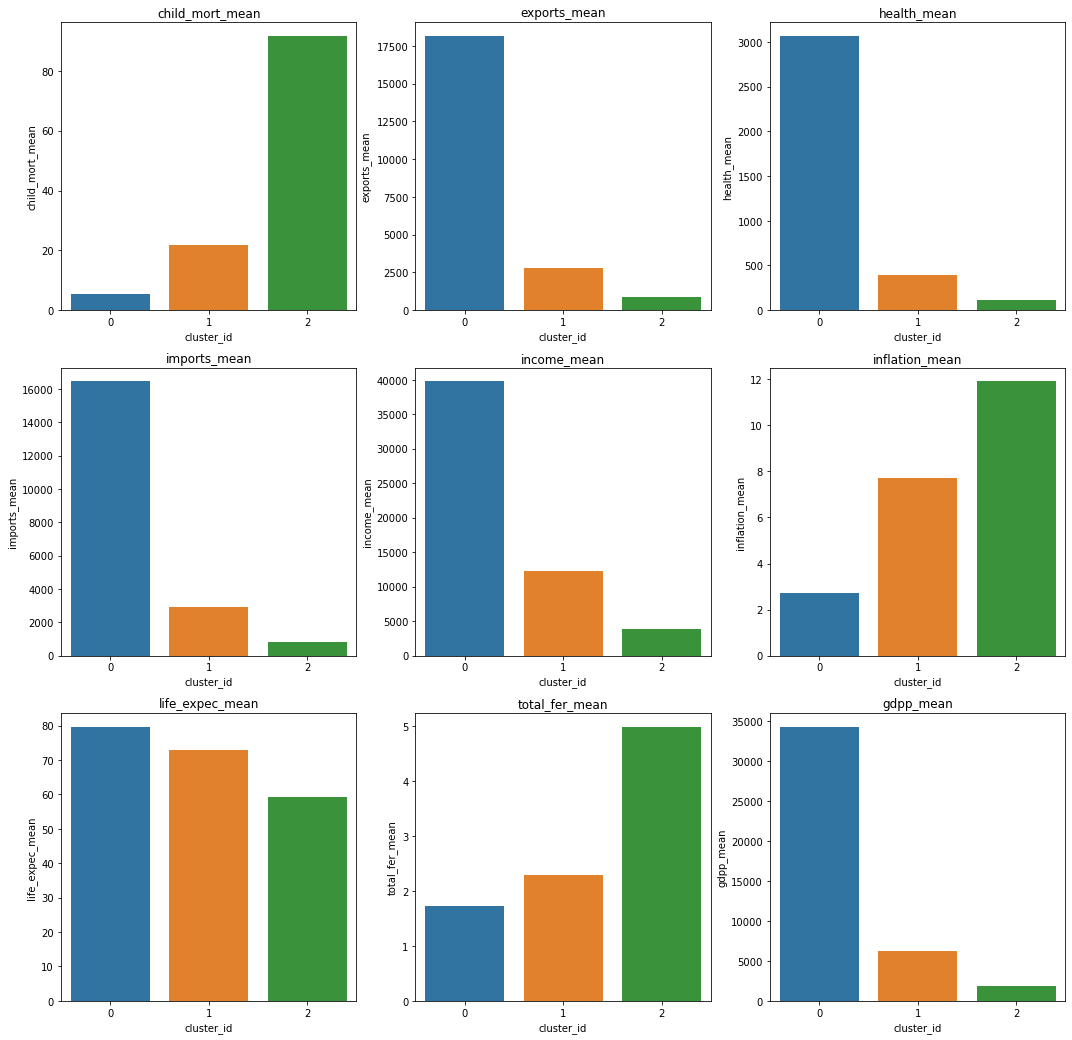

In [35]:
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean")
sns.barplot(country_meandata.cluster_id, country_meandata.child_mort_mean)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports_mean")
sns.barplot(country_meandata.cluster_id, country_meandata.exports_mean)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health_mean")
sns.barplot(country_meandata.cluster_id, country_meandata.health_mean)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports_mean")
sns.barplot(country_meandata.cluster_id, country_meandata.imports_mean)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income_mean")
sns.barplot(country_meandata.cluster_id, country_meandata.income_mean)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation_mean")
sns.barplot(country_meandata.cluster_id, country_meandata.inflation_mean)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec_mean")
sns.barplot(country_meandata.cluster_id, country_meandata.life_expec_mean)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer_mean")
sns.barplot(country_meandata.cluster_id, country_meandata.total_fer_mean)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp_mean")
sns.barplot(country_meandata.cluster_id, country_meandata.gdpp_mean)

plt.show()

## Cluster Profiling

In [36]:
country_quant[['child_mort','income','gdpp','cluster_id']].groupby('cluster_id').mean()

,child_mort,income,gdpp
cluster_id,,,
0,5.489286,39753.571429,34253.571429
1,21.951220,12304.756098,6287.463415
2,91.610417,3897.354167,1909.208333


<Figure size 1440x720 with 0 Axes>

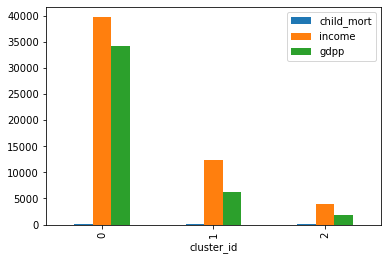

In [37]:
plt.figure(figsize=(20,10))
country_quant[['child_mort','income','gdpp','cluster_id']].groupby('cluster_id').mean().plot(kind='bar')

In [38]:
# Cluster-1

c1 = country_quant[country_quant['cluster_id']==1]
c1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
country,,,,,,,,,,
Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,1
Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,1
Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,1
Argentina,14.5,1946.70,834.30,1648.00,18700,20.90,75.8,2.37,10300,1
Armenia,18.1,669.76,141.68,1458.66,6700,7.77,73.3,1.69,3220,1


In [39]:
c1.sort_values(by=['gdpp','child_mort','income'], ascending=[True, False, True]).head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
country,,,,,,,,,,
Nepal,47.0,56.71,31.08,215.49,1990,15.10,68.3,2.61,592,1
Tajikistan,52.4,109.96,44.13,432.47,2110,12.50,69.6,3.51,738,1
Bangladesh,49.4,121.28,26.68,165.24,2440,7.14,70.4,2.33,758,1
Cambodia,44.4,425.23,44.64,467.67,2520,3.12,66.1,2.88,786,1
Kyrgyz Republic,29.6,454.08,54.38,718.96,2790,10.00,68.5,3.10,880,1
Myanmar,64.4,1.08,19.46,0.65,3720,7.04,66.8,2.41,988,1
Vietnam,23.3,943.20,89.60,1050.62,4490,12.10,73.1,1.95,1310,1
India,58.8,305.10,54.68,365.85,4410,8.98,66.2,2.60,1350,1
Uzbekistan,36.3,437.46,80.18,393.30,4240,16.50,68.8,2.34,1380,1


In [40]:
# Cluster 0

c0 = country_quant[country_quant['cluster_id']==0]
c0.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
country,,,,,,,,,,
Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,0
Bahamas,13.8,9800.0,2209.20,12236.0,22900,-0.393,73.8,1.86,28000,0
Bahrain,8.6,14386.5,1028.79,10536.3,41100,7.440,76.0,2.16,20700,0
Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,0
Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300,0


In [41]:
c0.sort_values(by=['gdpp','child_mort','income'], ascending=[True, False, True]).head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
country,,,,,,,,,,
Slovak Republic,7.0,12665.8,1459.14,12914.8,25200,0.485,75.5,1.43,16600,0
Czech Republic,3.4,13068.0,1560.24,12454.2,28300,-1.430,77.5,1.51,19800,0
Bahrain,8.6,14386.5,1028.79,10536.3,41100,7.440,76.0,2.16,20700,0
Malta,6.8,32283.0,1825.15,32494.0,28300,3.830,80.3,1.36,21100,0
South Korea,4.1,10917.4,1531.53,10210.2,30400,3.160,80.1,1.23,22100,0
Portugal,3.9,6727.5,2475.00,8415.0,27200,0.643,79.8,1.39,22500,0
Slovenia,3.2,15046.2,2201.94,14718.6,28700,-0.987,79.5,1.57,23400,0
Greece,3.9,5944.9,2770.70,8258.3,28700,0.673,80.4,1.48,26900,0
Bahamas,13.8,9800.0,2209.20,12236.0,22900,-0.393,73.8,1.86,28000,0


In [42]:
# Cluster 2

c2 = country_quant[country_quant['cluster_id']==2]
c2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
country,,,,,,,,,,
Afghanistan,90.2,55.30,41.92,248.30,1610,9.440,56.2,5.82,553,2
Angola,119.0,2199.19,100.60,1514.37,5900,22.400,60.1,6.16,3530,2
Benin,111.0,180.40,31.08,281.98,1820,0.885,61.8,5.36,758,2
Botswana,52.5,2768.60,527.05,3257.55,13300,8.920,57.1,2.88,6350,2
Burkina Faso,116.0,110.40,38.76,170.20,1430,6.810,57.9,5.87,575,2


In [43]:
c2.sort_values(by=['gdpp','child_mort','income'], ascending=[True, False, True]).head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
country,,,,,,,,,,
Burundi,93.6,20.61,26.80,90.55,764,12.30,57.7,6.26,231,2
Liberia,89.3,62.46,38.59,302.80,700,5.47,60.8,5.02,327,2
"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609,20.80,57.5,6.54,334,2
Niger,123.0,77.26,17.96,170.87,814,2.55,58.8,7.49,348,2
Sierra Leone,160.0,67.03,52.27,137.66,1220,17.20,55.0,5.20,399,2
Madagascar,62.2,103.25,15.57,177.59,1390,8.79,60.8,4.60,413,2
Mozambique,101.0,131.99,21.83,193.58,918,7.64,54.5,5.56,419,2
Central African Republic,149.0,52.63,17.75,118.19,888,2.01,47.5,5.21,446,2
Malawi,90.5,104.65,30.25,160.19,1030,12.10,53.1,5.31,459,2


* As per KMeans algorithm, countries with immediate need of aid are -

1) Burundi 

2) Liberia

3) Congo, Dem. Rep.

4) Niger

5) Sierra Leone

6) Madagascar

7) Mozambique

8) Central African Republic

9) Malawi

10) Eritrea

## Hierarchical Clustering

In [44]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.234847,-0.510090,-0.563606,-0.530151,-0.856955,0.124994,-1.572901,1.838989,-0.738376
1,-0.582710,-0.396063,-0.391458,-0.321693,-0.308713,-0.336520,0.723646,-0.889676,-0.459367
2,-0.318473,-0.336697,-0.453863,-0.392076,-0.113006,0.745941,0.746497,-0.078274,-0.430180
3,1.946065,-0.285794,-0.518904,-0.378423,-0.574267,1.333323,-1.127302,2.061470,-0.503541
4,-0.738289,0.064875,-0.035126,0.301255,0.295540,-0.620888,0.780774,-0.575585,0.180376


In [45]:
# Import Hierrachical clustering libraries

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

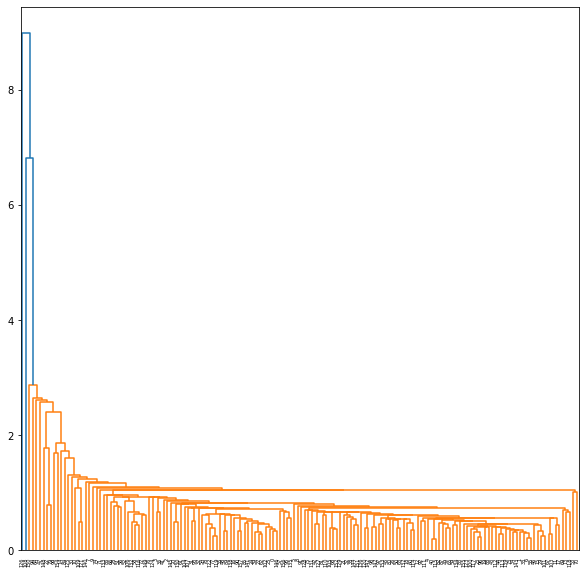

In [46]:
# heirarchical clustering single method

df1_clustering = df1
fig = plt.figure(figsize = (10,10))
mergings = linkage(df1_clustering, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

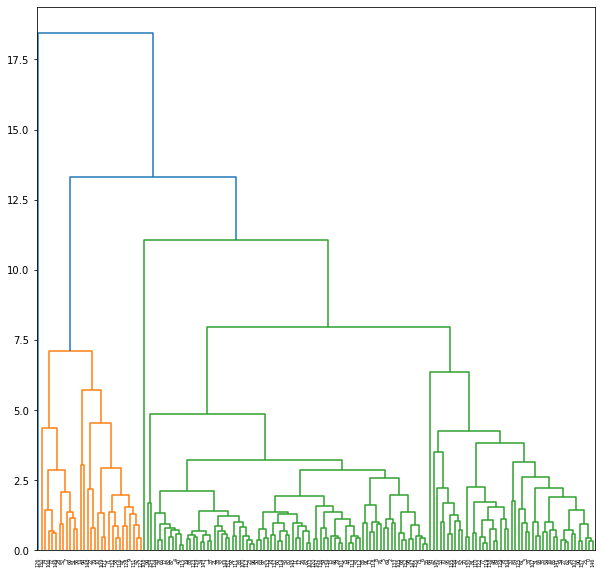

In [47]:
# complete method - Hierarchical Clustering

fig = plt.figure(figsize = (10,10))
mergings = linkage(df1_clustering, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

lets cut dendogram at n_clusters=3

In [48]:
# 3 clusters

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0])

In [49]:
# assign cluster labels

country_quant['cluster_labels'] = cluster_labels
country_quant.head()

<ipython-input-49-cf4ad814689e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_quant['cluster_labels'] = cluster_labels


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,2,0
Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,1,0
Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,1,0
Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,2,0
Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,1,0


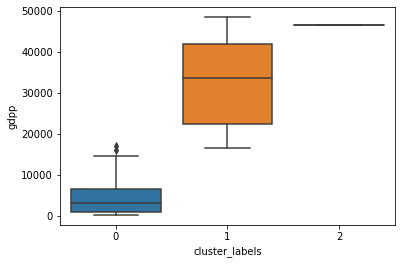

In [50]:
# plots

sns.boxplot(x='cluster_labels', y='gdpp', data=country_quant)

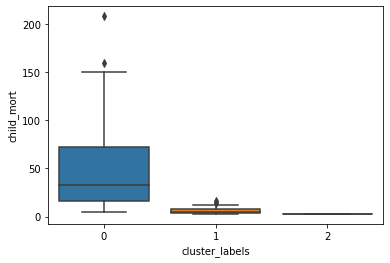

In [51]:
# plots

sns.boxplot(x='cluster_labels', y='child_mort', data=country_quant)

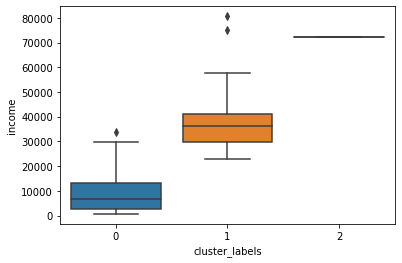

In [52]:
# plots

sns.boxplot(x='cluster_labels', y='income', data=country_quant)

In [53]:
#Let us bin our cluster 0

country_quant=country_quant[country_quant['cluster_labels']==0]
country_quant.sort_values(['gdpp','income','child_mort'], ascending=[True,True,False]).head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Burundi,93.6,20.61,26.80,90.55,764,12.30,57.7,6.26,231,2,0
Liberia,89.3,62.46,38.59,302.80,700,5.47,60.8,5.02,327,2,0
"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609,20.80,57.5,6.54,334,2,0
Niger,123.0,77.26,17.96,170.87,814,2.55,58.8,7.49,348,2,0
Sierra Leone,160.0,67.03,52.27,137.66,1220,17.20,55.0,5.20,399,2,0
Madagascar,62.2,103.25,15.57,177.59,1390,8.79,60.8,4.60,413,2,0
Mozambique,101.0,131.99,21.83,193.58,918,7.64,54.5,5.56,419,2,0
Central African Republic,149.0,52.63,17.75,118.19,888,2.01,47.5,5.21,446,2,0
Malawi,90.5,104.65,30.25,160.19,1030,12.10,53.1,5.31,459,2,0


## We have identified the list of countries which are in requirement of Aid at immediate basis as per KMeans and Hierarchical clustering.

## Both the list contain the same countries which are -

## 1) Burundi

## 2) Liberia

## 3) Congo, Dem. Rep.

## 4) Niger

## 5) Sierra Leone

## 6) Madagascar

## 7) Mozambique

## 8) Central African Republic

## 9) Malawi

## 10) Eritrea